In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# Loading the Data

In [2]:
PATH = '/content/drive/MyDrive/Data/customer_churn_large_dataset.xlsx'
dataset = pd.read_excel(PATH)

In [3]:
data = dataset.drop(['Name'], axis = 1)
data.columns = [col.lower() for col in data.columns]
data.head()

,customerid,age,gender,location,subscription_length_months,monthly_bill,total_usage_gb,churn
0,1,63,Male,Los Angeles,17,73.36,236,0
1,2,62,Female,New York,1,48.76,172,0
2,3,24,Female,Los Angeles,5,85.47,460,0
3,4,36,Female,Miami,3,97.94,297,1
4,5,46,Female,Miami,19,58.14,266,0


# EDA

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 8 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   customerid                  100000 non-null  int64  
 1   age                         100000 non-null  int64  
 2   gender                      100000 non-null  object 
 3   location                    100000 non-null  object 
 4   subscription_length_months  100000 non-null  int64  
 5   monthly_bill                100000 non-null  float64
 6   total_usage_gb              100000 non-null  int64  
 7   churn                       100000 non-null  int64  
dtypes: float64(1), int64(5), object(2)
memory usage: 6.1+ MB


Note: No Null Values

In [5]:
data.describe()

,customerid,age,subscription_length_months,monthly_bill,total_usage_gb,churn
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,50000.500000,44.027020,12.490100,65.053197,274.393650,0.497790
std,28867.657797,15.280283,6.926461,20.230696,130.463063,0.499998
min,1.000000,18.000000,1.000000,30.000000,50.000000,0.000000
25%,25000.750000,31.000000,6.000000,47.540000,161.000000,0.000000
50%,50000.500000,44.000000,12.000000,65.010000,274.000000,0.000000
75%,75000.250000,57.000000,19.000000,82.640000,387.000000,1.000000
max,100000.000000,70.000000,24.000000,100.000000,500.000000,1.000000


Note: No visible outliers here

<Axes: xlabel='age', ylabel='Count'>

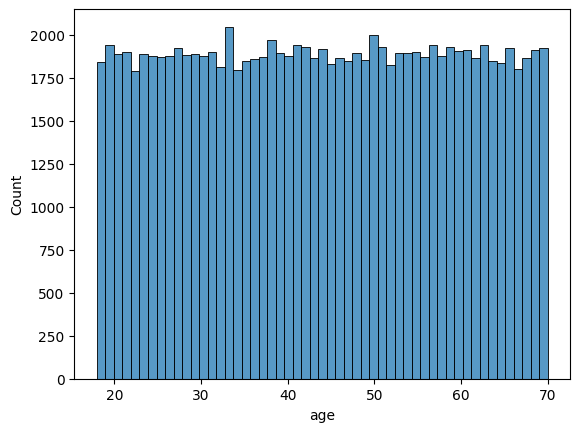

In [6]:
sns.histplot(data['age'], bins = 70 - 18 + 1)

Note: Clearly, all the age values are equally distributed throughout

<Axes: xlabel='location', ylabel='Count'>

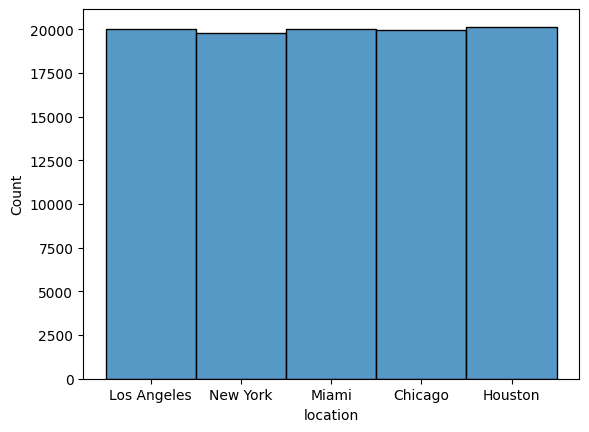

In [7]:
sns.histplot(data.location)

Note: Customers come evenly from all the different 5 places

<Axes: xlabel='subscription_length_months', ylabel='Count'>

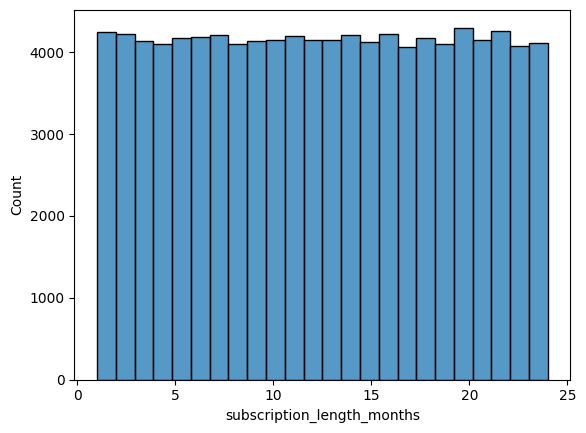

In [8]:
sns.histplot(data.subscription_length_months, bins = 24)

<Axes: xlabel='age', ylabel='subscription_length_months'>

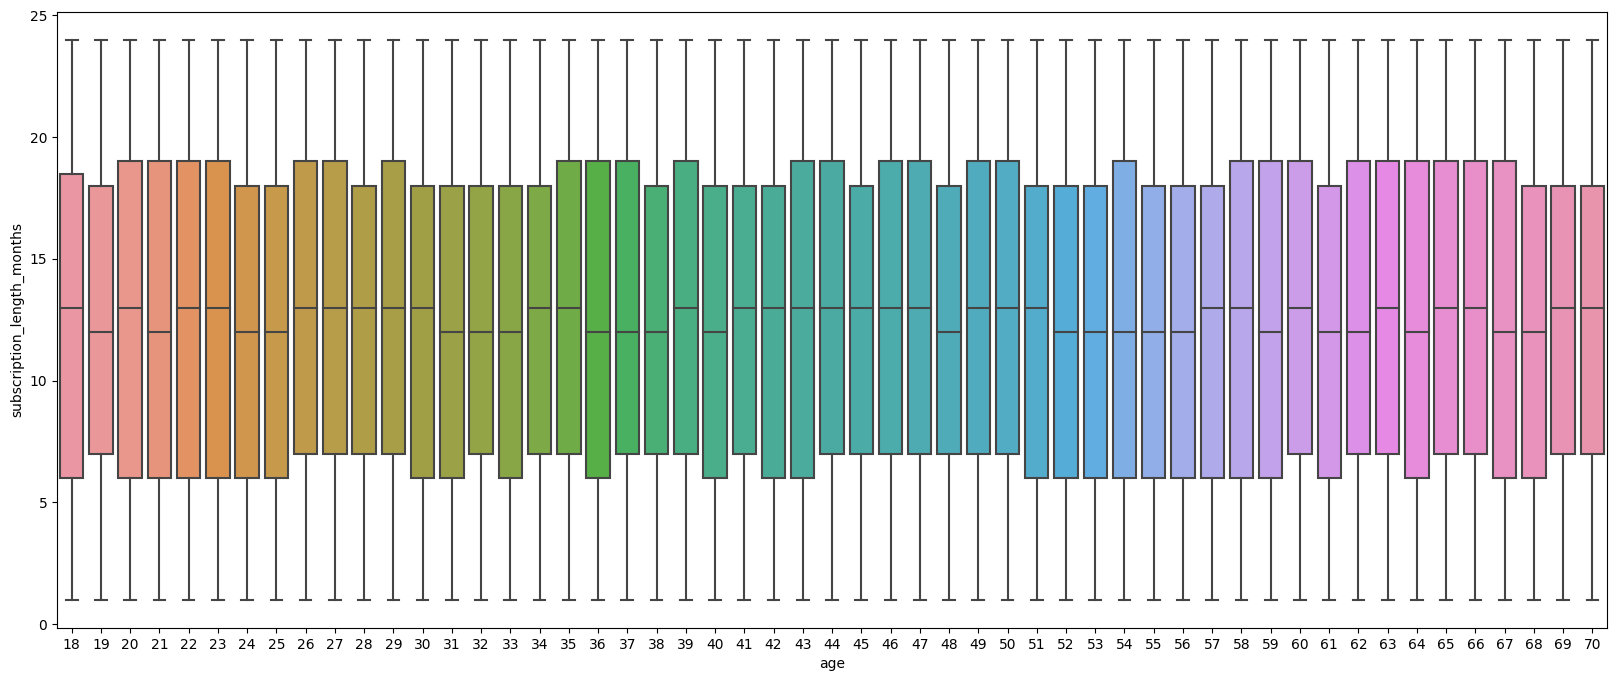

In [9]:
plt.figure(figsize=(20, 8))
sns.boxplot(data, x='age', y='subscription_length_months')

<Axes: xlabel='location', ylabel='subscription_length_months'>

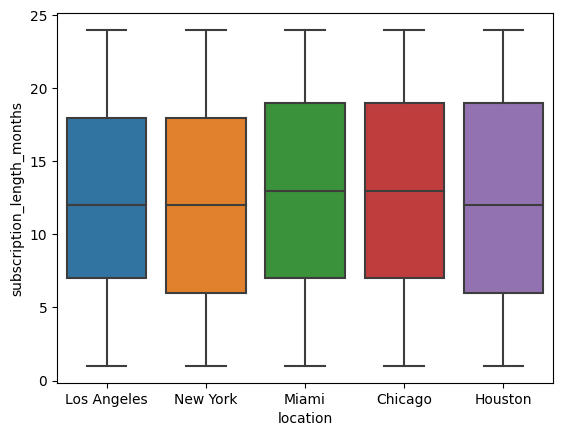

In [10]:
sns.boxplot(data, x='location', y='subscription_length_months')

Note: Looks pretty normal, no anomalies

<Axes: xlabel='monthly_bill', ylabel='Count'>

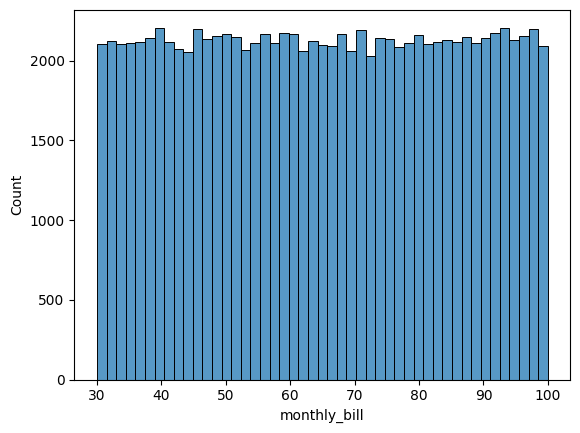

In [11]:
sns.histplot(data.monthly_bill)

<Axes: xlabel='age', ylabel='monthly_bill'>

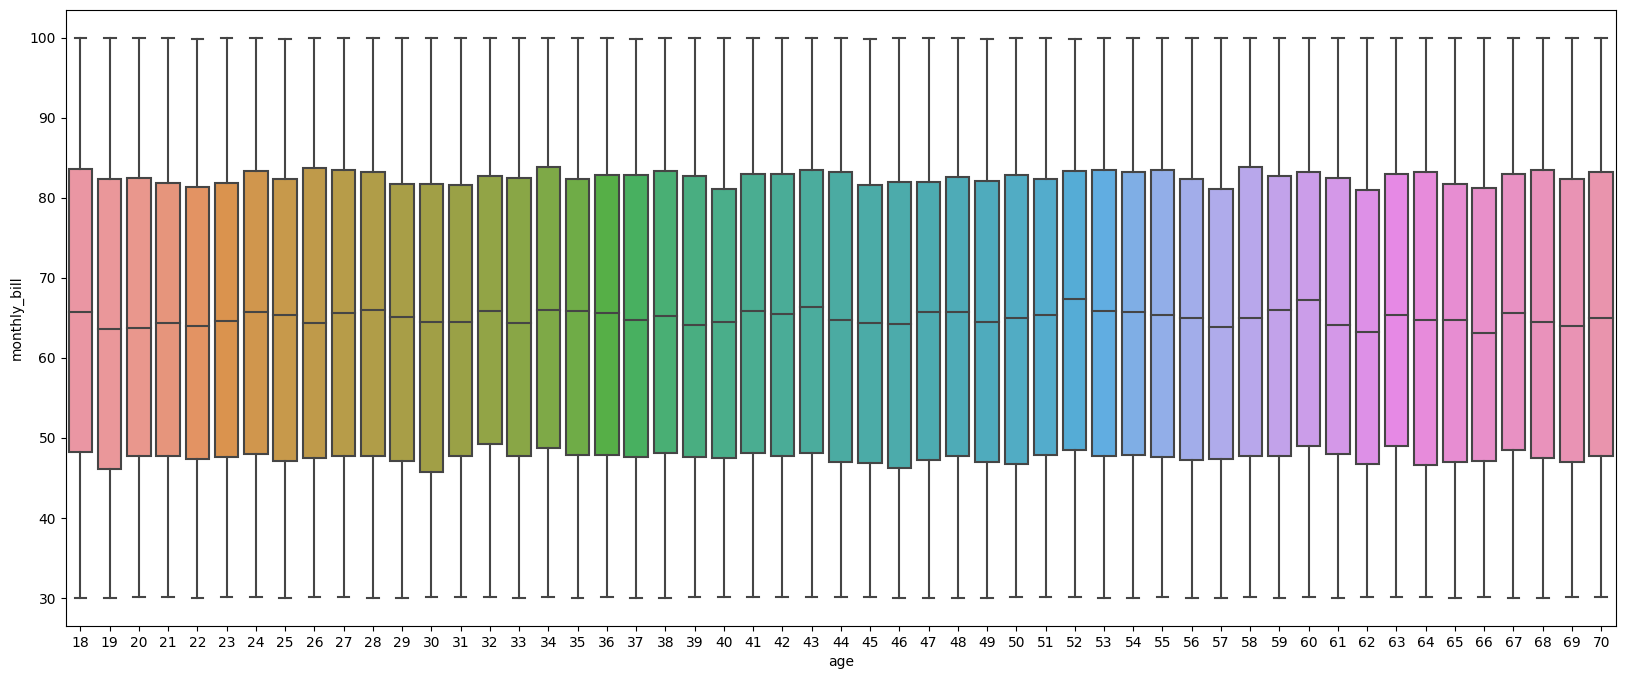

In [12]:
plt.figure(figsize=(20, 8))
sns.boxplot(data, x = 'age', y = 'monthly_bill')

<Axes: xlabel='location', ylabel='monthly_bill'>

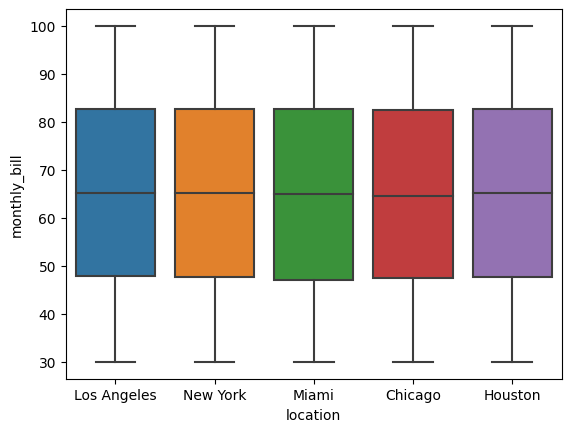

In [13]:
sns.boxplot(data, x = 'location', y = 'monthly_bill')

Note: Looks pretty clean, no anolmalies

<Axes: xlabel='total_usage_gb', ylabel='Count'>

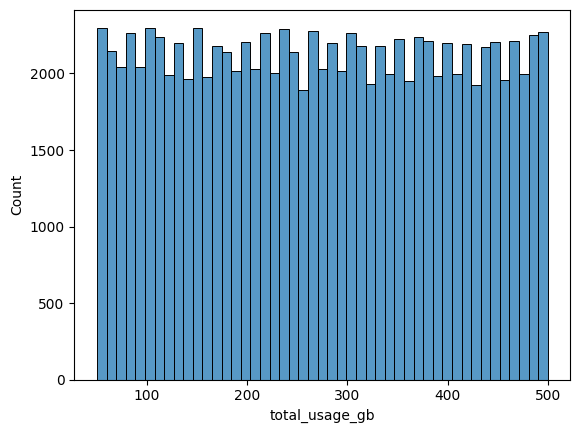

In [14]:
sns.histplot(data.total_usage_gb)

<Axes: xlabel='age', ylabel='total_usage_gb'>

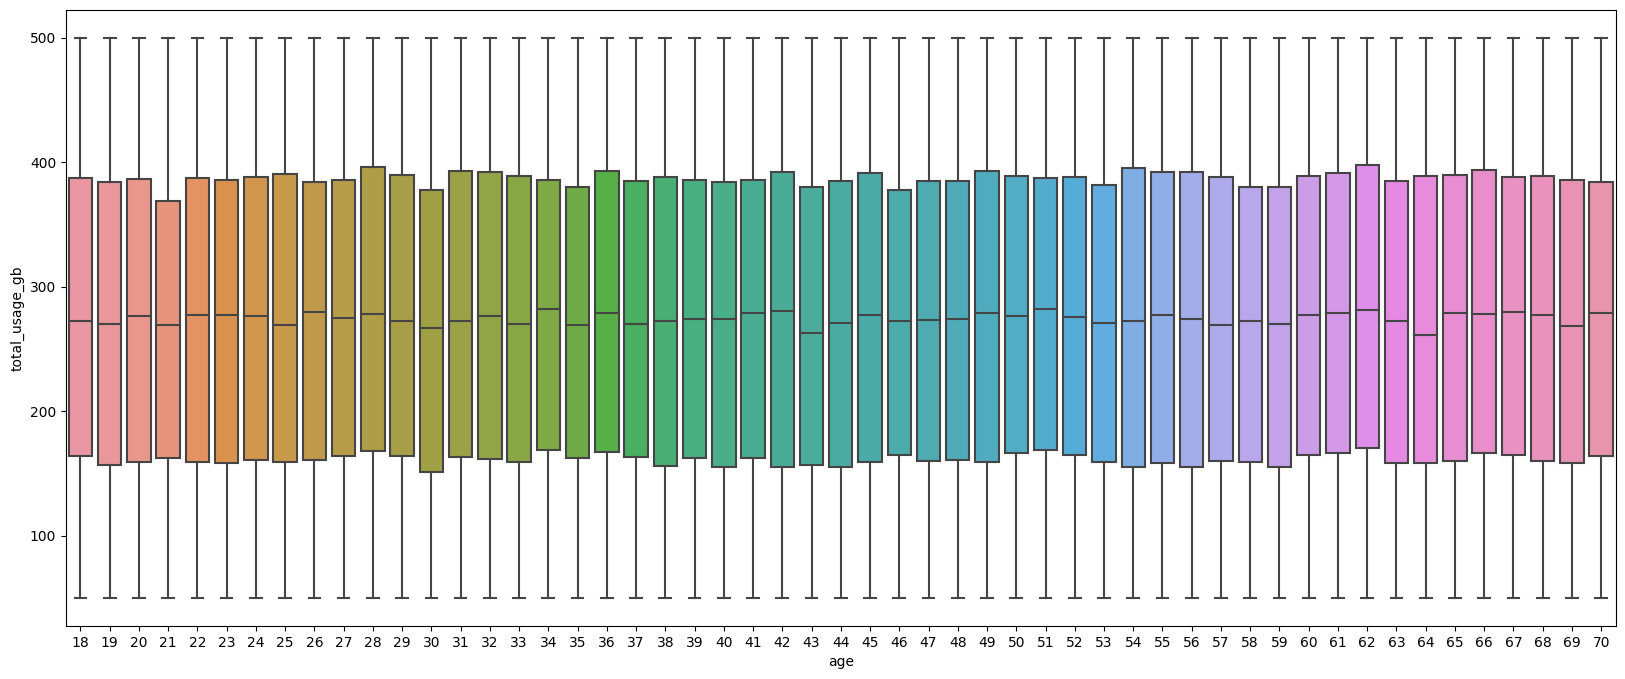

In [15]:
plt.figure(figsize = (20,8))
sns.boxplot(data, x = 'age', y = 'total_usage_gb')

<Axes: xlabel='location', ylabel='total_usage_gb'>

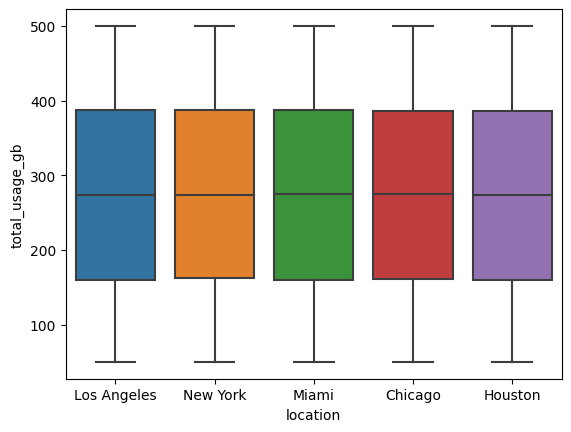

In [16]:
sns.boxplot(data, x = 'location', y = 'total_usage_gb')

Note: No anomalies here as well. Pretty evenly distributed.

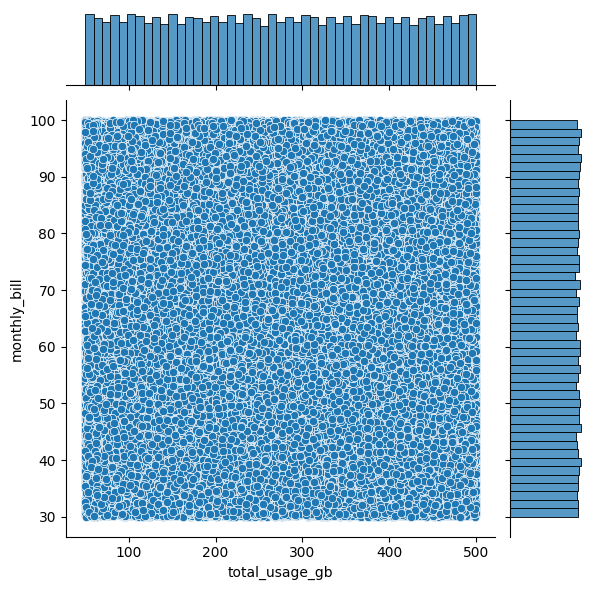

In [17]:
sns.jointplot(data, x = 'total_usage_gb', y = 'monthly_bill')

Note: No real relation between the 2 columns, pretty independent

<ipython-input-18-fbad6fe3e76d>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.drop('customerid', axis = 1).corr(), cmap = 'rainbow', annot = True)


<Axes: >

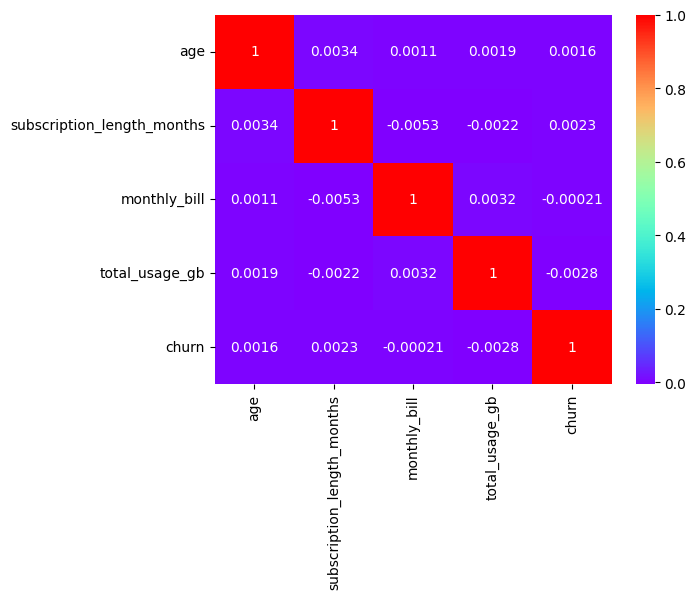

In [18]:
sns.heatmap(data.drop('customerid', axis = 1).corr(), cmap = 'rainbow', annot = True)

Note: Clearly states no realtion whatsoever. Churn follows no trend with any other column. It is almost like the churn values have been randomly assigned i.e. 2 extremely similar cases with all the values very close to each other can still have different churn predictions.

In [19]:
data['churn'].value_counts()

0    50221
1    49779
Name: churn, dtype: int64

In [20]:
for location in data.location.unique():
    print(f'{location}: ')
    print(data[data['location'] == location]['churn'].value_counts())
    print('---'*30)

Los Angeles: 
0    10161
1     9880
Name: churn, dtype: int64
------------------------------------------------------------------------------------------
New York: 
1    9979
0    9834
Name: churn, dtype: int64
------------------------------------------------------------------------------------------
Miami: 
1    10076
0     9955
Name: churn, dtype: int64
------------------------------------------------------------------------------------------
Chicago: 
0    10013
1     9945
Name: churn, dtype: int64
------------------------------------------------------------------------------------------
Houston: 
0    10258
1     9899
Name: churn, dtype: int64
------------------------------------------------------------------------------------------


<Axes: xlabel='total_usage_gb', ylabel='monthly_bill'>

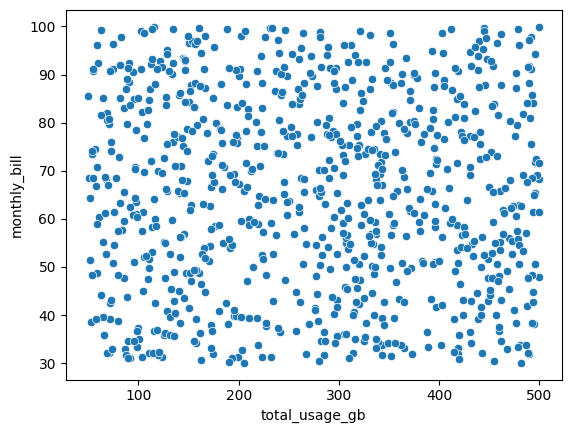

In [53]:
sns.scatterplot(data[(data['subscription_length_months'] == 1) & (data['location'] == 'Chicago')], x = 'total_usage_gb', y = 'monthly_bill')

This plot shows trend between **total_usage_gb** and **monthly_bill** when the subscription length is 1 month and the location is 0.
We can see that, for a total_usage_gb of less than 100 the monthly_bill can go as high as 100 and as low as 30. <br>
**This is very inconsistent.**

# Feature Engineering

In [22]:
full_df = data.copy()

In [23]:
gender_map = {'Male': 0, 'Female': 1}
location_map = {loc:i for i,loc in enumerate(sorted(full_df.location.unique()))}

In [24]:
location_map

{'Chicago': 0, 'Houston': 1, 'Los Angeles': 2, 'Miami': 3, 'New York': 4}

In [25]:
full_df['gender'] = full_df['gender'].map(gender_map)
full_df['location'] = full_df['location'].map(location_map)

In [27]:
# full_df['monthly_usage_gb'] = full_df['total_usage_gb'] / full_df['subscription_length_months']
# full_df['total_bill'] = full_df['monthly_bill'] * full_df['subscription_length_months']
# full_df['gb_rate'] = full_df['total_usage_gb'] / full_df['total_bill']
# full_df['age_bins'] = full_df['age'].apply(lambda x: x // 10 - 2 if x >= 20 and x < 70 else 2 if x < 20 else 4)

Tried creating new feautres, no improvement

In [28]:
# from sklearn.preprocessing import MinMaxScaler
# data['monthly_bill'] = MinMaxScaler().fit_transform(data['monthly_bill'].values.reshape(-1, 1))
# data['total_usage_gb'] = MinMaxScaler().fit_transform(data['total_usage_gb'].values.reshape(-1, 1))

Tried Feature Scaling, no improvement

# Imports and Data Preparation


In [31]:
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, log_loss
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.feature_selection import f_classif, SelectKBest

from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

In [32]:
!pip install catboost
from catboost import CatBoostClassifier

In [33]:
X, y = full_df.drop(['customerid', 'churn'], axis = 1), full_df.churn
# X, y = train_df.drop(['customerid', 'churn'], axis = 1), train_df.churn

In [159]:
# X_test, y_test = test_df.drop(['customerid', 'churn'], axis = 1), test_df.churn

# Model Training

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 101)
def training_model(model, training_params, training_set, test_set):
    model.fit(*training_set, **training_params)
    predictions = model.predict(test_set[0])
    return model, classification_report(test_set[1], predictions)

In [35]:
rfc_model, rfc_cr = training_model(RandomForestClassifier(), {}, (X_train, y_train), (X_test, y_test))
print(f'RFC: \n{rfc_cr}')
etc_model, etc_cr = training_model(ExtraTreesClassifier(), {}, (X_train, y_train), (X_test, y_test))
print(f'ETR: \n{etc_cr}')
lgbm_model, lgbm_cr = training_model(LGBMClassifier(), {}, (X_train, y_train), (X_test, y_test))
print(f'LGBM: \n{lgbm_cr}')
xgb_model, xgb_cr = training_model(XGBClassifier(), {}, (X_train, y_train), (X_test, y_test))
print(f'XGB: \n{xgb_cr}')

RFC: 
              precision    recall  f1-score   support

           0       0.51      0.52      0.51     10054
           1       0.50      0.48      0.49      9946

    accuracy                           0.50     20000
   macro avg       0.50      0.50      0.50     20000
weighted avg       0.50      0.50      0.50     20000

ETR: 
              precision    recall  f1-score   support

           0       0.50      0.51      0.51     10054
           1       0.49      0.48      0.49      9946

    accuracy                           0.50     20000
   macro avg       0.50      0.50      0.50     20000
weighted avg       0.50      0.50      0.50     20000

[LightGBM] [Info] Number of positive: 39833, number of negative: 40167
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001638 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 592
[

# SMOTEENN

In [36]:
from imblearn.combine import SMOTEENN

In [37]:
sm = SMOTEENN()
X_resampled, y_resampled = sm.fit_resample(X, y)
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size = 0.2, random_state = 101)

In [38]:
sm = SMOTEENN()
X_resampled, y_resampled = sm.fit_resample(X, y)
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size = 0.2, random_state = 101)

rfc_model, rfc_cr = training_model(RandomForestClassifier(), {}, (X_train, y_train), (X_test, y_test))
print(f'RFC: {rfc_cr}')
etc_model, etc_cr = training_model(ExtraTreesClassifier(), {}, (X_train, y_train), (X_test, y_test))
print(f'ETC: {etc_cr}')
lgbm_model, lgbm_cr = training_model(LGBMClassifier(verbose = 0), {}, (X_train, y_train), (X_test, y_test))
print(f'LGBM: {lgbm_cr}')
xgb_model, xgb_cr = training_model(XGBClassifier(), {}, (X_train, y_train), (X_test, y_test))
print(f'XGB: {xgb_cr}')
cb_model, cb_cr = training_model(CatBoostClassifier(), {'verbose':0}, (X_train, y_train), (X_test, y_test))
print(f'CB: {cb_cr}')

RFC:               precision    recall  f1-score   support

           0       0.66      0.66      0.66      1321
           1       0.65      0.65      0.65      1278

    accuracy                           0.66      2599
   macro avg       0.66      0.66      0.66      2599
weighted avg       0.66      0.66      0.66      2599

ETC:               precision    recall  f1-score   support

           0       0.63      0.62      0.62      1321
           1       0.61      0.62      0.62      1278

    accuracy                           0.62      2599
   macro avg       0.62      0.62      0.62      2599
weighted avg       0.62      0.62      0.62      2599

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001699 seconds.
You can set `force_col_wise=true` to remove the overhead.
LGBM:               precision    recall  f1-score   support

           0       0.63      0.61      0.62      1321
           1       0.61      0.63      0.62      1278

 

In [39]:
print(X.columns)
print(rfc_model.feature_importances_)
print(etc_model.feature_importances_)
print(lgbm_model.feature_importances_)
print(xgb_model.feature_importances_)
print(cb_model.feature_importances_)

Index(['age', 'gender', 'location', 'subscription_length_months',
       'monthly_bill', 'total_usage_gb'],
      dtype='object')
[0.20132398 0.02768897 0.06283969 0.14613329 0.28218618 0.2798279 ]
[0.22023098 0.02055094 0.06651781 0.18092177 0.25415904 0.25761946]
[625  69 139 393 793 981]
[0.18833493 0.13000926 0.13966    0.16647406 0.18838617 0.18713562]
[20.17759547  2.61587079  5.98853944 16.14280981 24.25240252 30.82278198]


Since the continuous value columns have shown very less correlation with churn, lets take the columns age, location and monthly_bill for training. <br>
Even though categorical columns have themselves not shown really great correlation with the churn feature, we are taking them because correlation matrix does not very clearly show how well the categorical columns are relating with each other.

In [43]:
best_cols = ['age', 'location', 'monthly_bill']

sm = SMOTEENN()
X_resampled, y_resampled = sm.fit_resample(X[best_cols], y)
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size = 0.2, random_state = 101)

rfc_model, rfc_cr = training_model(RandomForestClassifier(), {}, (X_train, y_train), (X_test, y_test))
print(f'RFC: {rfc_cr}')
etc_model, etc_cr = training_model(ExtraTreesClassifier(), {}, (X_train, y_train), (X_test, y_test))
print(f'ETC: {etc_cr}')
lgbm_model, lgbm_cr = training_model(LGBMClassifier(verbose = 0), {}, (X_train, y_train), (X_test, y_test))
print(f'LGBM: {lgbm_cr}')
xgb_model, xgb_cr = training_model(XGBClassifier(), {}, (X_train, y_train), (X_test, y_test))
print(f'XGB: {xgb_cr}')
cb_model, cb_cr = training_model(CatBoostClassifier(), {'verbose':0}, (X_train, y_train), (X_test, y_test))
print(f'CB: {cb_cr}')

RFC:               precision    recall  f1-score   support

           0       0.91      0.93      0.92      1374
           1       0.92      0.90      0.91      1268

    accuracy                           0.91      2642
   macro avg       0.91      0.91      0.91      2642
weighted avg       0.91      0.91      0.91      2642

ETC:               precision    recall  f1-score   support

           0       0.91      0.93      0.92      1374
           1       0.92      0.90      0.91      1268

    accuracy                           0.91      2642
   macro avg       0.91      0.91      0.91      2642
weighted avg       0.91      0.91      0.91      2642

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000690 seconds.
You can set `force_col_wise=true` to remove the overhead.
LGBM:               precision    recall  f1-score   support

           0       0.69      0.71      0.70      1374
           1       0.68      0.65      0.66      1268

 

Since Extra Trees Classifier is working best among these models, we'll do a bit more feature engineering and model training to see if we can achieve something even better

Iteration 0 score: 0.9178652535957608
Iteration 1 score: 0.9140802422407267
Iteration 2 score: 0.9182437547312642
Iteration 3 score: 0.915215745647237
Iteration 4 score: 0.9080242240726722
Mean:  0.9146858440575322


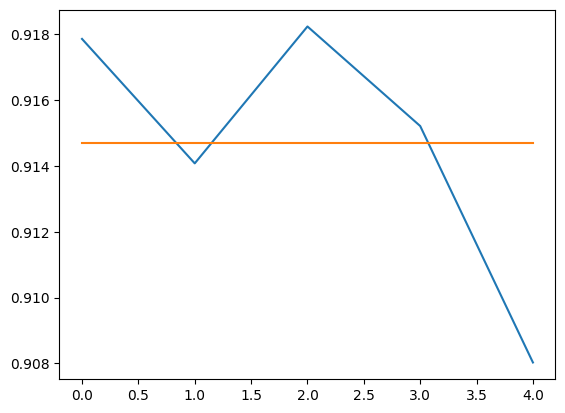

In [47]:
splits = 5
skfold = StratifiedKFold(splits, shuffle = True, random_state = 51)
skfold.get_n_splits(X_resampled, y_resampled)

scores = []
models = []

for i, (train_idx, test_idx) in enumerate(skfold.split(X_resampled, y_resampled)):
    print(f"Iteration {i} score:", end = " ")

    X_train, y_train = X_resampled.loc[train_idx], y_resampled.loc[train_idx]
    X_test, y_test = X_resampled.loc[test_idx], y_resampled.loc[test_idx]

    model_etc = ExtraTreesClassifier()
    model_etc.fit(X_train, y_train)
    predictions = model_etc.predict(X_test)
    score = accuracy_score(y_test, predictions)

    print(score)

    scores.append(score)
    models.append(model_etc)

print("Mean: ", np.mean(scores))
plt.plot([_ for _ in range(splits)], scores)
plt.plot([_ for _ in range(splits)], [np.mean(scores)] * splits)

In [48]:
best_model = models[2]

In [49]:
import pickle
pickle.dump(best_model, open('model.pkl', 'wb'))

### Conclusion:
The data is extremely random. There is no realistic relation between any of the columns and the churn values seem randomly assigned to each row. However, with SMOTEENN, I have been able to oversample the data, which has proven useful with Extra Trees Classifier.